# **What is the resistance of the truncated conical resistor?**
Computational essay FYS1120 2024, Frederik Callin Østern and Jonas Jørgensen Telle

*We model a truncated conical resistor, solving Laplace' equation in cylindrical coordinates with a finite difference method, testing two different ways to discretize the problem. Our model indicates that the standard analytical solution is off by about 8.6% percent for the sample case with a/h = 1/2 and b/h = 1, aligning with previous work (Romano & Price, 1996). This error depends on the dimenisons of the resistance, and we test a small grid of values. With more dramatic angles $\alpha$ (the angle of the slope of the cone from a vertical line), we should expect that it increases the error from the analytical resistance, which is what we find.*


In the weekly excercises for FYS1120 at UiO (Excercise 7.8, week 6), one finds the resistance of a truncated conical resistor to be

$$ R_{ana} = \frac{\rho h}{\pi a b} = \frac{h}{\sigma \pi a b}$$

where $\rho$ is the resistivity of the conducting material (and $\sigma$ the conductivity), $h$ is the length of the resistor and $a$ and $b$ are the lower and upper radii.
This result can be obtained by dividing the resistor into cylinders of infitesimal height with ideally conducting inlets and integrating to obtain the total resistance. However, the inclusion of these ideally conducting inlets means that the equipotential surfaces in the model are all parallel. Moreover, the current density will be vertical everywhere. In a real conical resistor, this is clearly not the case since the material has isotropic resistivity, though the approximation is reasonable if $ \alpha ≈ 0 $. Alternatively, this text-book answer is a solution to a different physical system of an anisotropic resistance, where $\rho_z = \rho$ and $\rho_r \approx 0$ (Romano & Price, 1996). If the current density is everywhere vertical, the charge would also escape from the boundary of the resistor.


In our solution, we assume that no charge escapes the resistor, so that the flow  immediately inside its surface is parallell to that surface. With Ohm's law, this means that the electric field is parallell to the surface, or equivalently, that the normal derivative of the potential at the curved surface is zero. We provide two methods for solving Laplace's equation using a finite difference method. In method 1, we use the same intervals along all axes, and model the resistor and its exterior using von Neumann boundary conditions on the curved surfaces, Dirichlet boundary conditions on the top and bottom surfaces and standard von Neumann boundaries at the edges of the modelled region. In method 2, we use different intervals along the axes in order to focus our modelling on the inside of the resistor, finding that this provides a smaller in the resistance for some dimensions of the cone.


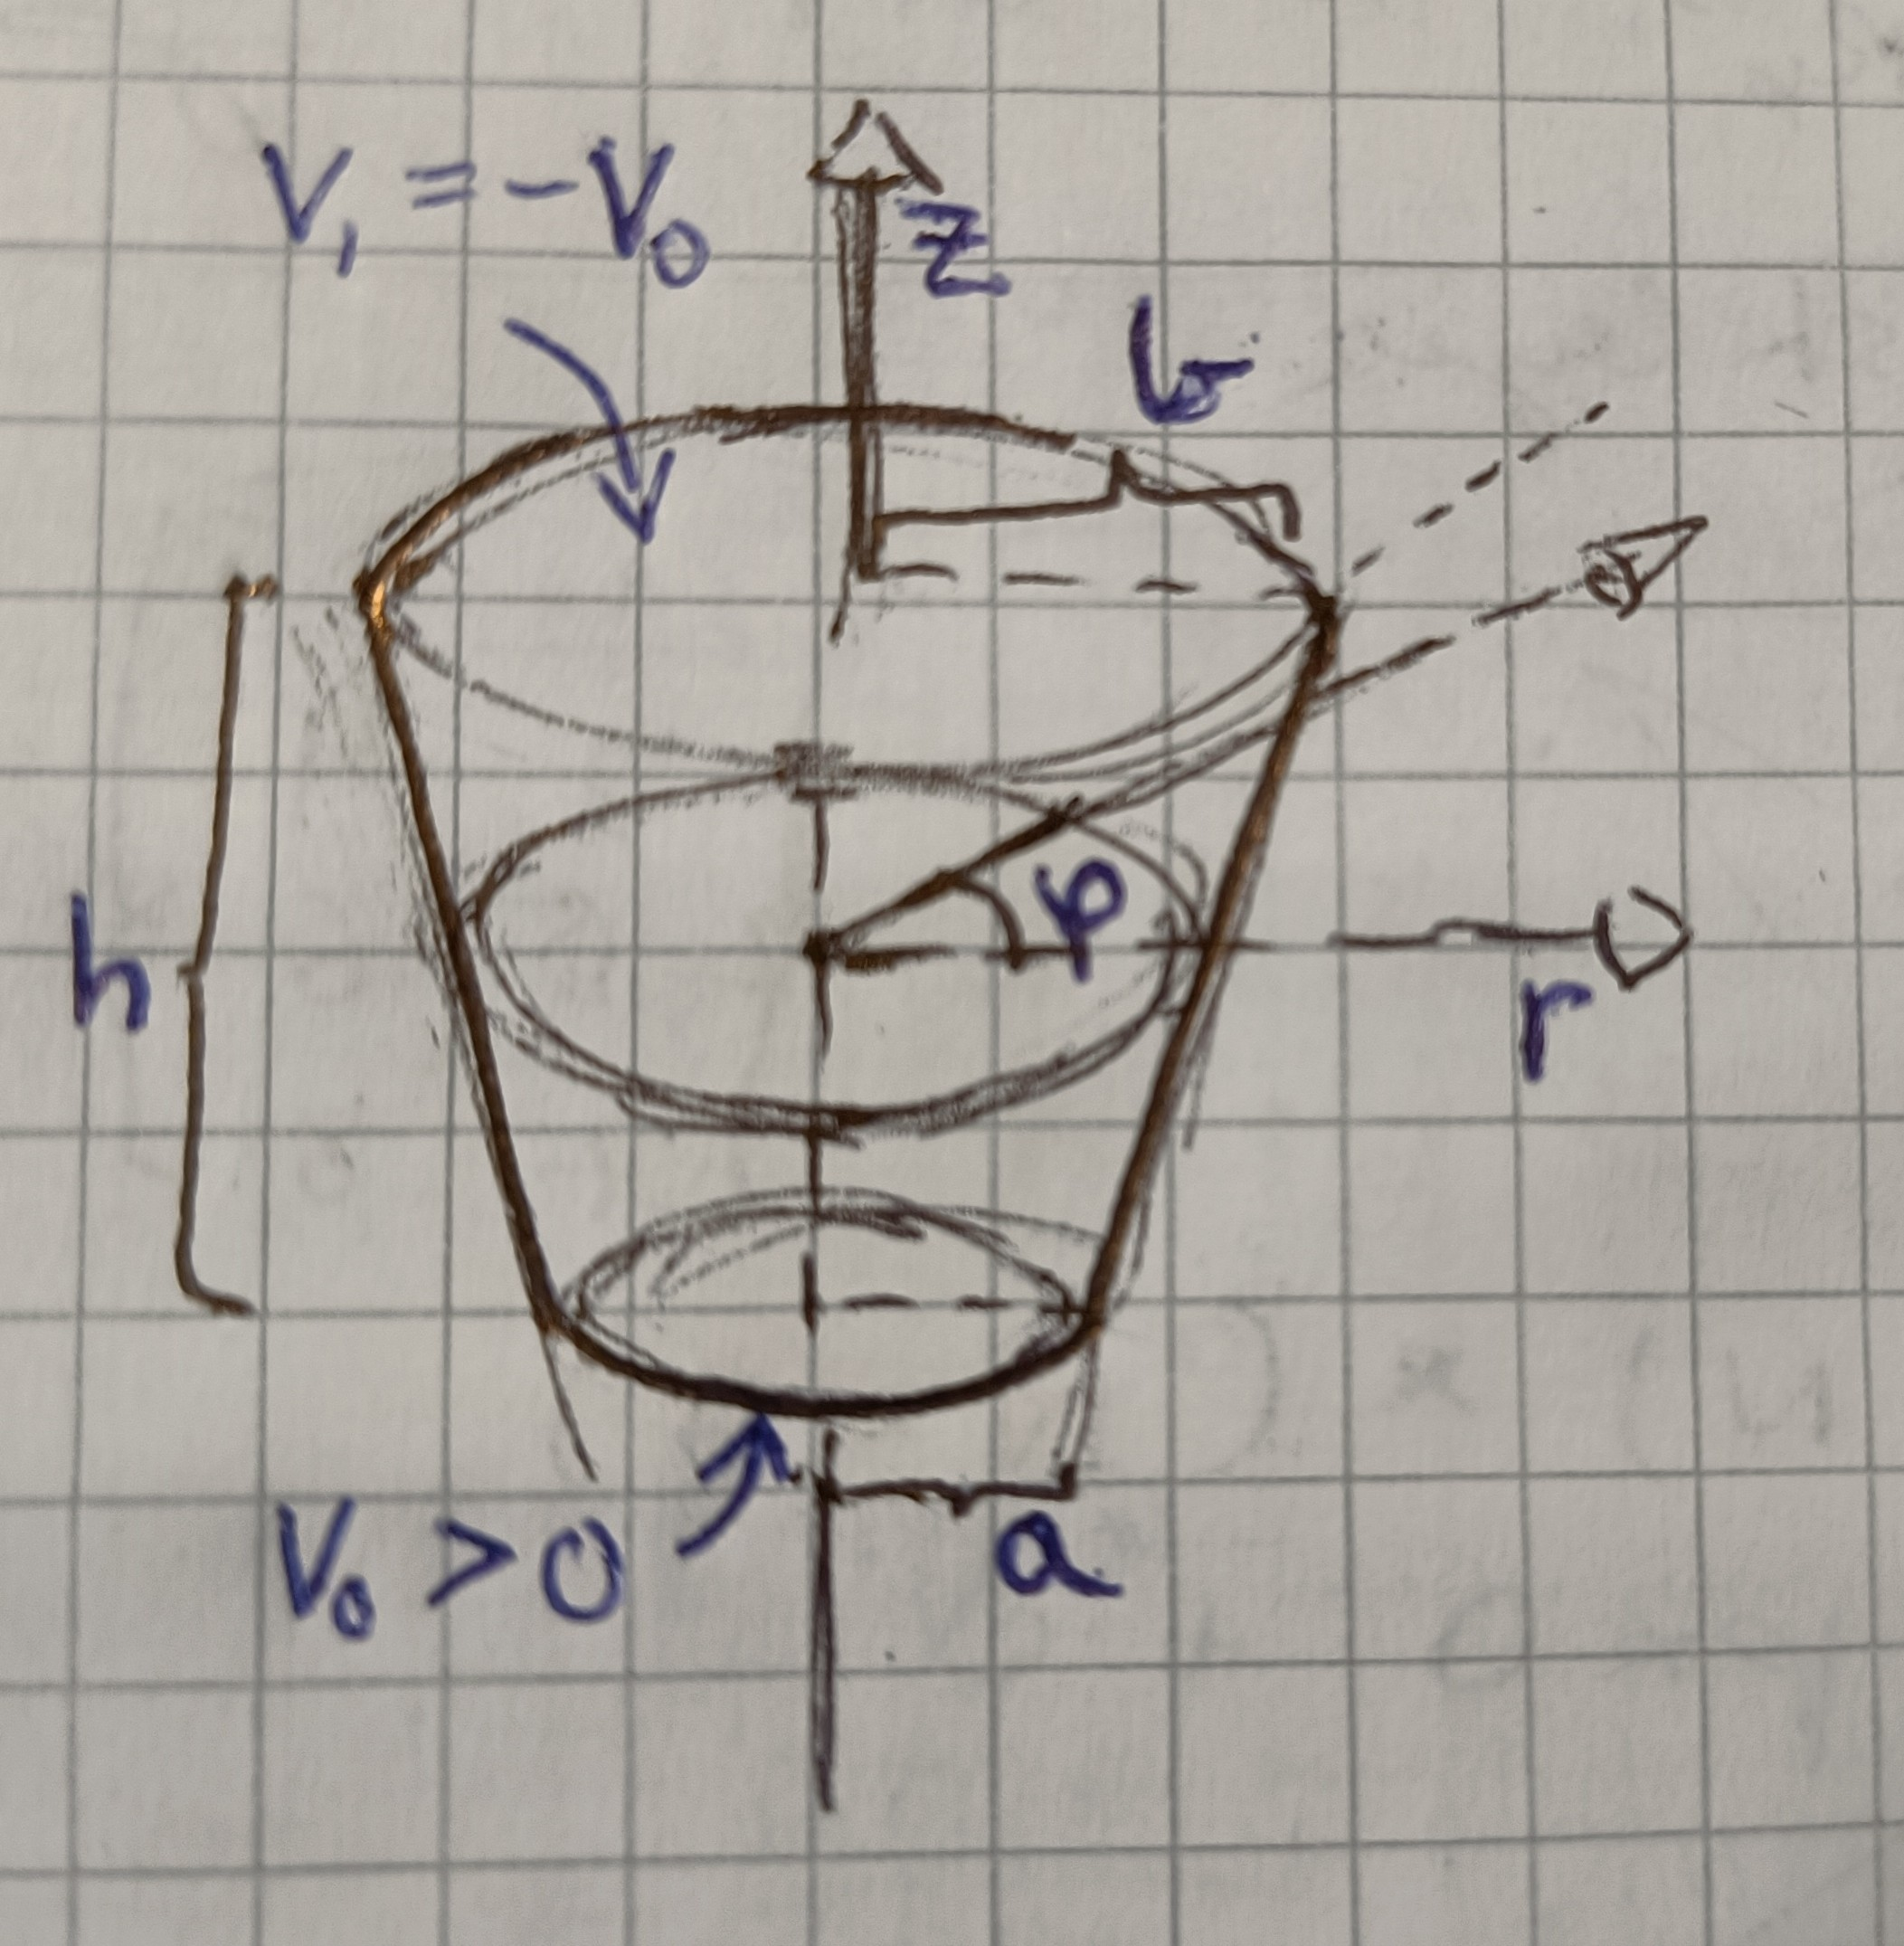

*Figure 1: The truncated cone in a cylindrical coordinate system.*

# **Theory**

The setup of our system is shown in figure 1. We have a truncated conical resistor with radii $a$ and $b$ and height $h$. It is placed in a cylindrical coordinate system, with the z-axis of the coordinate system along the axis of the cone (which is orthogonal to the top and bottom surfaces), and with the origin at the center of the resistor. There are ideal conductors on the top and bottom surfaces, so that they are at constant potential. We define the zero point of the potential so that the bottom surface has potential $V_0 > 0$, and the top has potential $V_1 = -V_0$.

After a long time, any conductor (whether ideal or non-ideal) will have zero free charge density in the interior, $\rho = 0$. All the charges will distribute themselves on the surface of the conductor. Hence, in the *interior*, Laplace's equation will hold (here written in cylindrical coordinates):

$$\vec{\nabla}^2V = \frac{1}{r}\frac{\partial}{\partial r}(r \frac{\partial V}{\partial r}) + \frac{1}{r^2}\frac{\partial^2 V}{\partial \phi^2} + \frac{\partial^2 V}{\partial z^2} = 0$$

We can simplify by noting that there is rotational symmetry about the z-axis so that $\frac{\partial V}{\partial \phi} = 0$. Thus,

\begin{equation}
\frac{1}{r}\frac{\partial}{\partial r}(r \frac{\partial V}{\partial r}) + \frac{\partial^2 V}{\partial z^2} = 0   \tag{1}
\end{equation}

where $V$ is a function of $z$ and $r$, $V = V(z,r)$. Thus, we can pick $\phi = 0$ and solve Laplace's equation in the r-z plane instead. From here on, we will have picked $\phi = 0$ and we will focus on the r- and z-dependence.

If we solve Laplace's equation in the interior, we can use it to compute the electric field, $\vec{E}(z,r) = -\vec{\nabla}V(z,r) = -\frac{\partial V(z,r)}{\partial r} - \frac{\partial V(z,r)}{\partial z}$. *Ohm's law* on local form then allows us to calculate the current density $\vec{J}$ inside the resistor:

\begin{equation}
\vec{J}(z,r) = \sigma \vec{E}(z,r)   \tag{2}
\end{equation}

Here, $\sigma$ is the conductivity of the material that the resistor is made of. We will assume that it is uniform (and of course, isotropic) throughout the material.

Using the charge density, we can find the current $I(z)$ through any circular cross section of the resistor at a given height $z$,

\begin{equation}
I(z) = \int_0^{r_{bound}(z)} J_z(z,r) 2 \pi r dr   \tag{3}
\end{equation}

Here, $J_z$ is the z-component of the current density, $r_{bound}(z)$ is the radial coordinate of the boundary of the resistor for a given $z$. From the geometry of the resistor (and the fact that the plane with $z=0$ is in the middle of the resistor), we find that

\begin{equation}
r_{bound}(z) = \frac{b-a}{h}z + \frac{a+b}{2} \tag{4}
\end{equation}

If we have implemented our numerical solution correctly, then $I(z)$ should be the same for any $z$ (within the resistor), $I(z) = I$. This tells us that no charge has leaked out of the resistor. Hence, checking that $I(z)$ does not depend (appreciably) on z provides a sanity check of our numerical solution.

Lastly, with the voltage difference $\Delta V = V_0 - V_1 = 2V_0$ and current $I$, we can compute the resistance:

\begin{equation}
R = \frac{\Delta V}{I} = \frac{2V_0}{I}  \tag{5}
\end{equation}




The boundary conditions for the solution to Laplace's equation are that $V = V_0$ on the bottom  surface and $V = V_1 = -V_0$ on the top surface. Moreover, we wish to make sure that no charge leaks through the sides of the conductor (since we can assume that the outside is a perfect insulator). This means that $\vec{J}$ should have no component normal to the surface of the conductor at the sides of the conductor. Since $\vec{E} \propto \vec{J}$, this means that $\vec{E}$ should have no component normal to the surface on the side of the conductor, and hence

$\frac{\partial V}{\partial n} = \vec{n} \cdot \vec{\nabla}V = 0$

on the surface on the side of the conductor. Here, $\vec{n}$ is a unit vector normal to the surface. Thus, we have Dirichlet boundary conditions on the top and bottom surfaces, and von Neumann boundary conditions on the sides. From the existence and uniqueness theorem, this means that there will be a unique solution to Laplace's equation in the interior of the resistor.


# **Numerical solution: Method 1**

We attempted to solve the problem numerically using two different methods. Both methods gave decent answers, and so we compare the methods at the end.

In both methods, we solve Laplace's equation numerically by using the finite difference method. We discretize the r-z plane, by assuming that $r$ only can take the discrete values $r_i = i dr$ (for $i \in \{0,1,2,..,N_r + 1\}$, where $N_r$ is the number of intervals along the r-direction). Here, $dr$ is some interval along the r-axis. Similarly, $z$ can only take the discrete values $z_i = -L + idz$ (here $i \in \{ 0,1,2,3,...,N_z\}$, where $N_z$ is a number such that $z_{N_z} = L$) Here, $dz$ is an interval along the z-direction.

The potential only takes on values on the discretized grid, so that the potential at the point $r_i$ and $z_j$ is $V_{j,i} = V(z_j,r_i)$. Then we can approximate derivatives as $\frac{\partial V(z_j,r_j)}{\partial r} \approx \frac{V(z_j,r_i) - V(z_j,r_{i-1})}{dr}$ and $\frac{\partial V(z_j,r_j)}{\partial z} \approx \frac{V(z_j,r_i) - V(z_{j-1},r_i)}{dz}$. We then discretize Laplace's equation at the point $(z_j,r_i)$ to get

<br>

\begin{equation}
0 = \frac{1}{r}\frac{\partial}{\partial r}(r \frac{\partial V}{\partial r}) + \frac{\partial^2 V}{\partial z^2} = \frac{1}{r}\frac{\partial V}{\partial r} + \frac{\partial^2 V}{\partial r^2} + \frac{\partial^2 V}{\partial z^2} \approx \frac{1}{r_i}\frac{V(z_j,r_i) - V(z_j,r_{i-1})}{dr} + \frac{(V(z_j,r_{i+1}) - V(z_j,r_i)) + (V(z_j,r_{i-1}) - V(z_j,r_i))}{dr^2} + \frac{(V(z_{j+1},r_i) - V(z_j,r_i)) + (V(z_{j-1},r_i) - V(z_j,r_i))}{dz^2}  \tag{6}
\end{equation}

<br>

Using this equation, we find

<br>

\begin{equation}
V(z_j,r_i) = \frac{\frac{V(z_{j-1},r_i)}{dz^2} + \frac{V(z_{j+1},r_i)}{dz^2} + \frac{V(z_j,r_{i+1})}{dr^2} + V(z_j,r_{i-1})(\frac{1}{dr^2} - \frac{1}{r_idr})}{\frac{2}{dr^2} + \frac{2}{dz^2} - \frac{1}{r_idr}}  \tag{7}
\end{equation}

<br>

The von Neumann boundary conditions on the side of the resistor give $\frac{\partial V}{\partial r}n_r + \frac{\partial V}{\partial z}n_z = 0$, where $n_r$ and $n_z$ are the r- and z-components of the normal unit vector $\vec{n}$ respectively. From the geometry of the conical resistor, we have $-\frac{n_z}{n_r} = \frac{b-a}{h}$, and hence $\frac{\partial V}{\partial r} = \frac{b-a}{h}\frac{\partial V}{\partial z}$. When we discretize this equation, we get

<br>

\begin{equation}
V(z_j,r_i) = V(z_j,r_{i-1}) + \frac{b-a}{h}\frac{dr}{dz}(V(z_j,r_{i-1}) - V(z_{j-1},r_{i-1}))    \tag{8}
\end{equation}

<br>

Here, we used the previous values of V to calculate the new value of V, $V(z_j,r_i)$. We do this because in our numerical implementation, we solve for the values with smaller $z$ and $r$ first.


In method 1, the interval along the dr and dz directions were the same, $dr=dz$. This simplifies the expressions above somewhat, since we can cancel out common factors of dr. Method 1 is also characterized by the fact that we solve Laplace's equation in a bigger (rectangular) area in the r-z plane than just in the interior of the cone. The reason we have to to this, is illustrated in figure 2. As shown, in general, we need to know the potential outside the cone to find what it will be on (or close to) the boundary. But in order to know the potential right outside the cone, we also need to know it further outside the cone etc. Thus, we need to solve Laplace's equation in a large area. On the edges of that area, we will implement von Neumann boundary conditions. This represents the fact that the electric field goes to zero infinitely far away from the cone.

<br>

There is one point worth mentioning here, and that is the edge with $r = 0$. The points on this edge are not infinitely far away, so why do we  implement von Neumann boundary conditions here? The point is that, due to rotational symmetry, the electric field (and hence the gradient of the potential) will only have a component along the z-axis. Hence, the normal component of the gradient of the potential (which in our case is the derivative in the radial direction of the potential) should be 0.



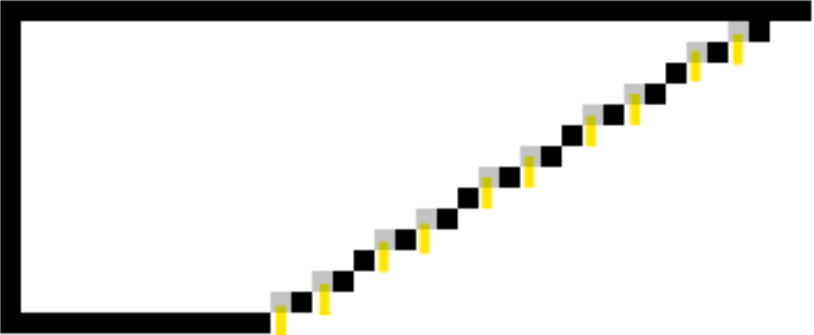

*Figure 2: Illustration of a potential problem with method 1. Ideally, we would like to restrict our calculations to the region bounded by the cone, on which we know all boundary conditions. However, in order to enforce the von Neuann conditions on the sloped edge (black points), we need the partial derivatives of the potential at that point. We use the potential at the point left-to and below our point of interest in the calculation (see eq. 7). When $dz = dr$ as in method 1, we get holes (gray points), which means that we need to calculate the potentials at the yellow marked points - outside the cone!*

Now, we finally show the numerical implementation. First, we import various libraries. We use numpy to work with arrays, matplotlib.pyplot to plot our results, and numba to speed up our calculations.

In [ ]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

Next, we define various parameters in our model. $L$ is the length along the r-axis, and the length along the z-axis is $2L$. We have N intervals along the r-axis and $2N$ intervals along the z-axis. We choose two dimension parameters which define the resistance's shape, namely the ratios 'a over h' and 'b over h'. In the end, we may vary these parameters to test different resistance shapes, to confirm that larger deviations from a cylinder increases the error in the analytical solution. In that way, we can see how the relationship between the resistance we find, and the analytical expression, varies as a function of those ratios.

In [ ]:
# Resistance dimension variables
a = 1 # lower radius
a_over_h = 2/3
b_over_h = 1
b = (b_over_h/a_over_h)*a # upper radius
h = round(a/a_over_h) # height

N = 300 # number of grid points: (N+1 x 2N+1)
L = 8*a # plot length
dr = dz = L/N # step size
r, z = np.linspace(0, L, N+1), np.linspace(-L,L,2*N+1)
assert np.allclose(r, z[N:]) # test

Below, we implement the boundary conditions. We define a 2-dimensional array B, with elements $B[iz][ir]$ where iz is the index on the z-axis and ir is the index on the r-axis. The elements in the array have value NaN at any point that is not on the boundary of the cone. At the top and bottom surfaces, the value of the elements in B are the Dirichlet boundary conditions for the potential, and on the boundary on the sides of the cone, it takes the value np.inf.

The idea is that B tells us whether we are at a point different from the boundary (where we need to enforce Laplace's equation), on the top and bottom surfaces (where we need to implement the Dirichlet boundary conditions), or on the side surface (where we need to implement the von Neumann boundary conditions).

In [ ]:
# Boundary conditions
B = np.zeros((2*N+1, N+1)) # z is first coordinate, first idx corresponds to -L; r is second coordinate, first idx corresponds to 0
B[:] = np.nan

# Dirichlet boundary conditions
z_lower = int((L - h/2) / dr)
r_lower = int(a / dr)
z_upper = int((L + h/2) / dr)
r_upper = int(b / dr)

V_0 = 1
B[z_lower, :r_lower+1] = V_0 # importantly, both values should be non-zero,
B[z_upper, :r_upper+1] = -V_0 # and we choose the reference to ensure equal maginitude


# Von Neumann boundary conditions (curved surface)
def r_boundary(z_val):
    return ((b-a)/h)*z_val + a + (b-a)/2

for iz in range(z_lower+1, z_upper): # not including bottom and top planes - they have Dirichlet conditions
    for ir in range(r_lower, r_upper+2):
        if r[ir] >= r_boundary(z[iz]) and r[ir-1] < r_boundary(z[iz]):
            B[iz][ir] = np.inf
# The von Neumann boundary conditons at the outer edge are implemented directly in the solver

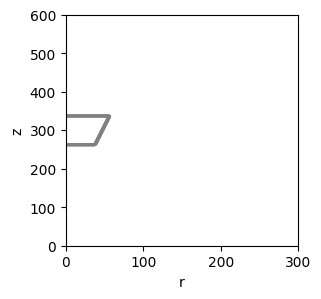

In [ ]:
# Plotting the cone outline to check that boundaries are correctly defined
cone = np.zeros_like(B)
cone[~np.isnan(B)] = 1
plt.figure(figsize=(3, 3))
plt.contour(cone, colors=".5")
plt.xlabel('r')
plt.ylabel('z')
plt.show()

The figure above shows the outline of the cone in the r-z plane.

In the function below, we solve Laplace's equation. The function takes two arguments, B and the number of iterations of the numerical solver. In the function, we solve Laplace's equation with a finite difference method using eq. 6 at all the points besides the boundary of the cone for each iteration. At the boundary of the cone (given by the points where B is different from NaN), we implement the relevant boundary conditions. For instance, we implement eq. 7 at all the points on the sides of the cone. Moreover, if we are on the edge of the rectangle in the r-z plane, then we implement von Neumann boundary conditions. We do this by noting that in each of these cases, one of the terms in eq. 5 will vanish. Thus, in the function below, we check whether or not we are on the edges of the rectangle. We sum up all the relevant terms in the denominator and numerator of eq. 6, corresponding to each time we are *not* at the edges.

In [ ]:
@jit
def solve_conical_problem(B, iter):
    """Global variable r containing a linspace of r-values.
    B is np.inf at surface boundaries and else has dirichlet boundaries where not np.nan. Automatic von neumann at edges."""
    V = np.copy(B)
    for i in range(len(V.flat)): # looping since jit struggles with boolean arrays
        if np.isnan(B.flat[i]) or np.isinf(B.flat[i]):
            V.flat[i] = 0.0

    V_new = np.copy(V)
    Lz, Lr = B.shape[0], B.shape[1]

    for _ in range(iter): # for each iteration
        for iz in range(Lz): # for each z-coordinate
            for ir in range(Lr): # for each r-coordinate

                if np.isinf(B[iz, ir]): # von Neumann boundaries at curved surface
                    V_new[iz, ir] = V_new[iz, ir-1] + ((b-a)/h)*(V_new[iz, ir-1] - V_new[iz-1, ir-1])

                elif np.isnan(B[iz, ir]): # Dirichlet boundaries at in/outlets
                    denom = 0
                    s = 0
                    ir_prime = ir
                    if ir == 0:
                        ir_prime += 1
                    denom = 0
                    s = 0
                    s += V[iz,ir_prime-1] -(dr/(r[ir_prime]))*V[iz,ir_prime-1]
                    denom += 1 - dr/r[ir_prime]
                    if iz > 0:
                        s += V[iz-1,ir_prime]
                        denom += 1
                    if ir_prime < Lr-1:
                        s += V[iz,ir_prime+1]
                        denom += 1
                    if iz < Lz-1:
                        s += V[iz+1,ir_prime]
                        denom += 1
                    V_new[iz,ir] = s/denom
                # else:
                #     V_new[iz,ir] = V[iz,ir]
        V, V_new = V_new, V
    return V

Now, we solve Laplace's equation. We use 60,000 iterations, which should be more than enough (assuming method 1 works!).

In [ ]:
V = solve_conical_problem(B, 60_000)

We can plot the resulting potential and electric field. We mirror the potential utilizing the symmetry in the problem to display the full x-z plane, as can be seen below.

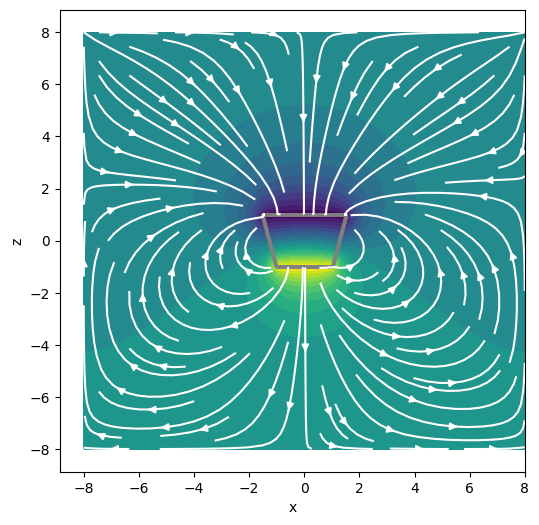

In [ ]:
# Plotting in xz-plane
r_mirror = -r[:0:-1] # this is now the negative x-axis...

x_ax = np.hstack( (r_mirror, r) ) # ...and now the full x-axis. Note the assymetry; we give 0 to the pos-ax.

V_combined = np.hstack( (np.fliplr(V), V) )[:,:-1]  # mirroring the potential
Ez_combined, Er_combined = np.gradient(-V_combined) # and calculating the E-field for the full system
cone_combined = np.hstack( (np.fliplr(cone), cone) )[:,:-1] # drawing the full cone

# Plotting
plt.figure(figsize=(6, 6))
plt.contourf(x_ax, z, V_combined, levels=20, cmap='viridis')
plt.contour(x_ax, z, cone_combined, colors='.5')
plt.streamplot(x_ax, z, Er_combined, Ez_combined, color='white')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

Finally, we *test* Method 1. Our test consists of calculating the current through cross sections of the cone at different, constant values of $z$. The current is calculated from eq. 3, except that we have discretized the integral, using a finite number of intervals with length $dr$ along the r-direction. If our code was implemented correctly, then, as explained previously, the current should be the same for any $z$ (so that no charge has leaked out of the system, which was a key assumption we made about the problem). We check whether this is true:

In [ ]:
Ez,Er = np.gradient(-V)
Ez = Ez/dr
Er = Er/dr

sigma = 10

def current(z):
    J = sigma*Ez
    r = dr
    I = 0
    iz = round((z + L)/dr)
    while r <= r_boundary(z):
        ir = round(r/dr) - 1
        I += 2*np.pi*r*dr*J[iz,ir]
        r += dr
    return I

Then, we calculate the resistance using the current we found using eq. 5. We compare this with the analytical current, given by $\frac{\rho h}{\pi a b} = \frac{h}{\pi \sigma a b}$. We also calculate the mean and make an estimate of the uncertainty, using one half of the difference between the max and min, of the current and resistance, based on the current calculated at various heights throughout the resistor.

In [ ]:
R = (2*V_0)/current(0)
R_ana = h/(sigma*np.pi*a*b)

currents = np.array([current(0), current(0.5),current(-0.5),current(0.8),current(-0.8)])
mean_I = np.mean(currents)
delta_I = (np.max(currents)-np.min(currents))/2
print("Currets at different heights: ", *currents)
print("Ratio (percent): ",(R/R_ana - 1)*100)
delta_R = 2*V_0*delta_I/(current(0)**2)
print("Delta_ratio: ",(delta_R/R_ana)*100)

Currets at different heights:  45.16787580139398 45.74877115896458 46.58413714533225 46.27437194775847 45.93113197936844
Ratio (percent):  4.330542377183355
Delta_ratio:  1.6356681772087873


 Clearly, the current is not completely uniform at different heights, despite the fact that we used 60 000 iterations, with the program taking more than 1 minute to run. Perhaps we can do even better?

# **Numerical solution: Method 2**

In the second method, we use much of the same implementation as above. However, there is a key difference: This time, we have different values for the intervals dr and dz. The idea here is to adjust the value of $dr$ in accordance with $dz$ such that $dz/dr$ is equal to the slope of the side edge of the cone. This means that every time we go up one unit in the z-direction (ie. we increase z by dz), we also go up one unit in the r-direction (ie. we increase r by dr) when we go along the boundary of the cone. Thus, with these intervals, we will no longer have any "holes" along the boundary, such as the points right above the yellow points in figure 2. The reason we do this, is that we can solve Laplace's equation solely within the cone, instead of having to also solve Laplace's equation outside the cone; the situation in figure 2 (where we need to know the potential at points outside the cone to find the potential on the boundary) will no longer apply. Thus, we have a far smaller area in which we need to solve Laplace's equation, and we would imagine that we could therefore obtain a solution with better resolution.

The slope of the boundary on the side of the conductor is $\frac{b-a}{h}$, meaning that we must have

$$\frac{dr}{dz} = \frac{b-a}{h}$$

This is implemented in the code below.

For the purposes of being able to run method 2 in isolation, we repeat our imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In addition to the parameters used in method 1, we define the natural number $N_z$. This is the number of z-intervals along the z-axis, so that $dz = \frac{h}{N_z}$. We decide to have the this number somewhere between 75 and 90. The natural number $N$ is the number of intervals in the r-direction needed to fill the lower radius $a$, $dr = a/N$. We want a whole number of r-intervals to fit along the boundary of the cone to make sure that there are no holes. This means that if there are $N_z$ intervals along the z-axis, then we should have $b-a = N_z dr$. Thus, since $dr = \frac{a}{N}$, we must have $N_z = \frac{b-a}{a}N$. Hence, the multiplication of the whole number $N$ with $\frac{b-a}{a}$ should be an integer, which proides a small limitation on which parameters one can use with this model.

In [ ]:
# Cone variables
a = 1 # lower radius
a_over_h = 1/2    # a/h (h is the height of the cone)
b_over_h = 3/4    #b/h
frac = (b_over_h-a_over_h) / a_over_h     # int / int. (b-a)/a
b = (frac+1)*a # upper radius
h = round(a/a_over_h)   # height

frac = round(frac, 10)
# N_z integer such that frac*N is an integer
for i in range(75,90):
  if i%frac == 0:
    N_z = i
    break

N = round(N_z/frac)

dz = h/N_z
dr = a/N       # ((b-a)/h)*dz
r_lower = N    # round(a / dr)
r_upper = round(b / dr)
r = np.linspace(0, b, r_upper+1)
z = np.linspace(-h/2,h/2,N_z+1)

Below, we implement the B-array of boundary conditions as in method 1. Here, the r-values only run from 0 to the upper radius $b$, and the z-values goes from $-h/2$ to $h/2$. Thus, we have the luxury of solving Laplace's equation in a much smaller area - only the cone interior - with method 2.

In [ ]:
# Dirichlet boundary conditions in array B
B = np.zeros((N_z + 1, r_upper + 1))
B[:] = np.nan

V_0 = 1
B[0, :r_lower+1] = V_0
B[N_z, :r_upper+1] = -V_0

# Von Neumann boundary conditions (curved surface) in array C
def r_boundary(z_val):
    return ((b-a)/h)*z_val + a + (b-a)/2

for iz in range(1,N_z): # not including bottom and top planes
        r_bound = round(r_boundary(z[iz])/dr)
        B[iz,r_bound] = np.inf
        B[iz,r_bound+1:] = 0
B[0,r_lower+1:] = 0
B[N_z,r_upper+1:] = 0

At last, we implement the function that solves Laplace's equation. This is implemented similarly to the function in method 1. The difference now is that dr and dz do not have the same value, meaning that we have to use the full machinery of eqs. 7 and 8.

Moreover, since we in method 2 do not need to solve Laplace's equation outside the cone, we set the potential equal to 0 here.


In [ ]:
@jit
def solve_conical_problem(B, nrep):
    """Global variable r containing a linspace of r-values.
    B is np.inf at surface boundaries and else has dirichlet boundaries where not np.nan. Automatic von neumann at edges."""
    V = np.copy(B)
    for i in range(len(V.flat)):
        if np.isnan(B.flat[i]) or np.isinf(B.flat[i]):
            V.flat[i] = 0.0
    V_new = np.copy(V)
    Lz = B.shape[0]
    Lr = B.shape[1]
    for n in range(nrep):
        for iz in range(Lz):
            for ir in range(Lr):
                if np.isinf(B[iz, ir]): # von Neumann boundaries at curved surface
                    V_new[iz, ir] = V_new[iz, ir-1] + ((b-a)/h)*(dr/dz)*(V_new[iz, ir-1] - V_new[iz-1, ir-1])
                elif np.isnan(B[iz,ir]):
                    denom = 0
                    s = 0
                    ir_prime = ir
                    if ir == 0:
                        ir_prime += 1
                    denom = 0
                    s = 0
                    s += V[iz,ir_prime-1]/dr**2 -(1/(r[ir_prime]*dr))*V[iz,ir_prime-1]
                    s += V[iz-1,ir_prime]/dz**2
                    s += V[iz,ir_prime+1]/dr**2
                    s += V[iz+1,ir_prime]/dz**2
                    denom += 2/dr**2 - 1/(r[ir_prime]*dr) + 2/dz**2
                    ''' Outside of cone, not neccessary
                    if iz > 0:
                        s += V[iz-1,ir_prime]/dz**2
                        denom += 1/dz**2
                    if ir_prime < Lr-1:
                        s += V[iz,ir_prime+1]/dr**2
                        denom += 1/dr**2
                    if iz < Lz-1:
                        s += V[iz+1,ir_prime]/dz**2
                        denom += 1/dz**2
                    '''
                    V_new[iz,ir] = s/denom

                # else:
                #     V_new[iz,ir] = V[iz,ir]
        V,V_new = V_new,V
    return V

Finally, we use the function to solve Laplace's equation. We also find the electric field using the potential, and set it equal to zero outside the cone (since we are only interested in the electric field inside the cone).

In [ ]:
V = solve_conical_problem(B, 300_000)

Ez, Er = np.gradient(-V)
Ez = Ez/dz
Er = Er/dr

for iz in range(N_z+1):
    for ir in range(r_upper+1):
        if ir > round(r_boundary(z[iz])/dr):
            Ez[iz,ir] = 0
            Er[iz,ir] = 0

Then, we define the function for finding the current, just like in method 1 (repeated isolation testing):

In [ ]:
sigma = 10

def current(z):
    J = sigma*Ez
    r = 0
    I = 0
    iz = round(z/dz) + round(N_z/2)
    while r < r_boundary(z):
        ir = round(r/dr)
        I += 2*np.pi*r*dr*J[iz,ir]
        r += dr
    return I

Here, we plot the potential and electric field on the cone interior.

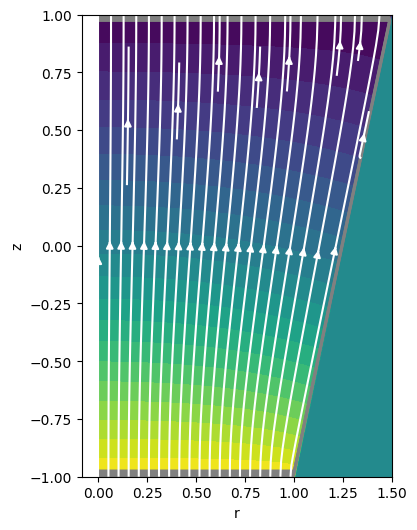

In [ ]:
plt.figure(figsize=(4,6))
plt.contourf(r, z, V, 20)

cone = np.zeros_like(B)
cone[~np.isnan(B)] = 1
plt.contour(r, z, cone, colors=".5")
plt.streamplot(r, z, Er, Ez, color='white')
plt.xlabel('r')
plt.ylabel('z')
plt.show()


We can again calculate the current for different values of z, together with an average and an uncertainty estimate. The analytical resistance is still $\frac{\rho h}{\pi a b} = \frac{h}{\pi \sigma ab}$, which we compare to the resistance calculated from our value for the current through a cross section in the middle of the cone ($z = 0$).

In [ ]:
R = (2*V_0)/current(0)
R_ana = h/(sigma*np.pi*a*b)

currents = np.array([current(0), current(0.5*h/2),current(-0.5*h/2),current(0.8*h/2),current(-0.8*h/2)])
mean_I = np.mean(currents)
delta_I = (np.max(currents)-np.min(currents))/2
print("Ratio (percent): ",(R/R_ana - 1)*100)
delta_R = 2*V_0*delta_I/(current(0)**2)
print("Delta_ratio: ",(delta_R/R_ana)*100)


Ratio (percent):  3.0223762826926626
Delta_ratio:  0.14367740453950978


# Results

We present the calculated percentage difference between the calculated resistance and the analytical resistance $\frac{\rho h}{\pi a b}$ in tables 1 and 2. We show the percentage difference, as well as the uncertainty in the percentage difference, which was calculated from the uncertainty in the current for different values of $z$.

In figure 3, we show an example of a plot of the electric field from method 1 outside the cone, and in figure 4 we show an example of a plot of the electric field from method 2 inside the cone. In figure 5 we plot the z-component of the electric field as a function of r using method 2.

The plot of the field streamlines and potential were given under Method 1 (figure 3), and a close up of the field inside the resistance was given in Method 2 (figure 4). With a/h = 1/2 and b/h = 1, which are the parameters used in the study which inspired our project (Romano & Price, 1996), we get 8.8% greater resistance, with a relatively stable current indicating reasonable accuracy. This agrees more or less perfectly with the estimated error of 9% in Romano & Price, 1996. With method 2, we get 10% error, which is still similar.

Table 1: Error in text-book solution as a function of model parameters, with values obtained with method 1 with a 301 by 601 grid and 60 000 iterations. The uncertainty is based on the variation of current throughout the cone in our nummerical solution, which indicate that we do not always converge on the exact soultion.


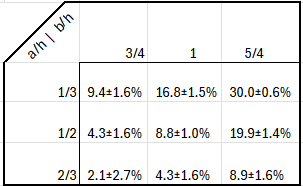

Table 2: Percentwise error in the text-book solution for different dimesion parameters using 300,000 iterations with Method 2, which dynamically adjusts the grid dimensions based on the dimension parameters. The uncertianty is as described in table 1, and note that, since different parameters give very different grid sizes, certain values give poor convergence in the allocated time.

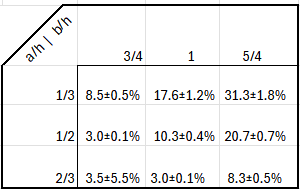


Figure 3: Streamplot of the field outside the cone and potential everywhere using method 1.
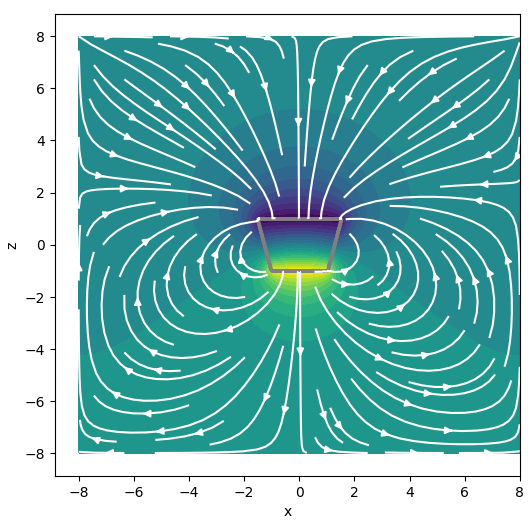

Figure 4: Streamline plot of E-field with potential inside the resistance with method 2. Notice the curved equipotential surfaces.

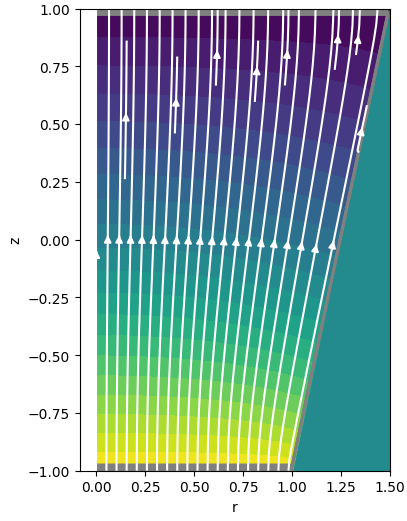

Figure 5.

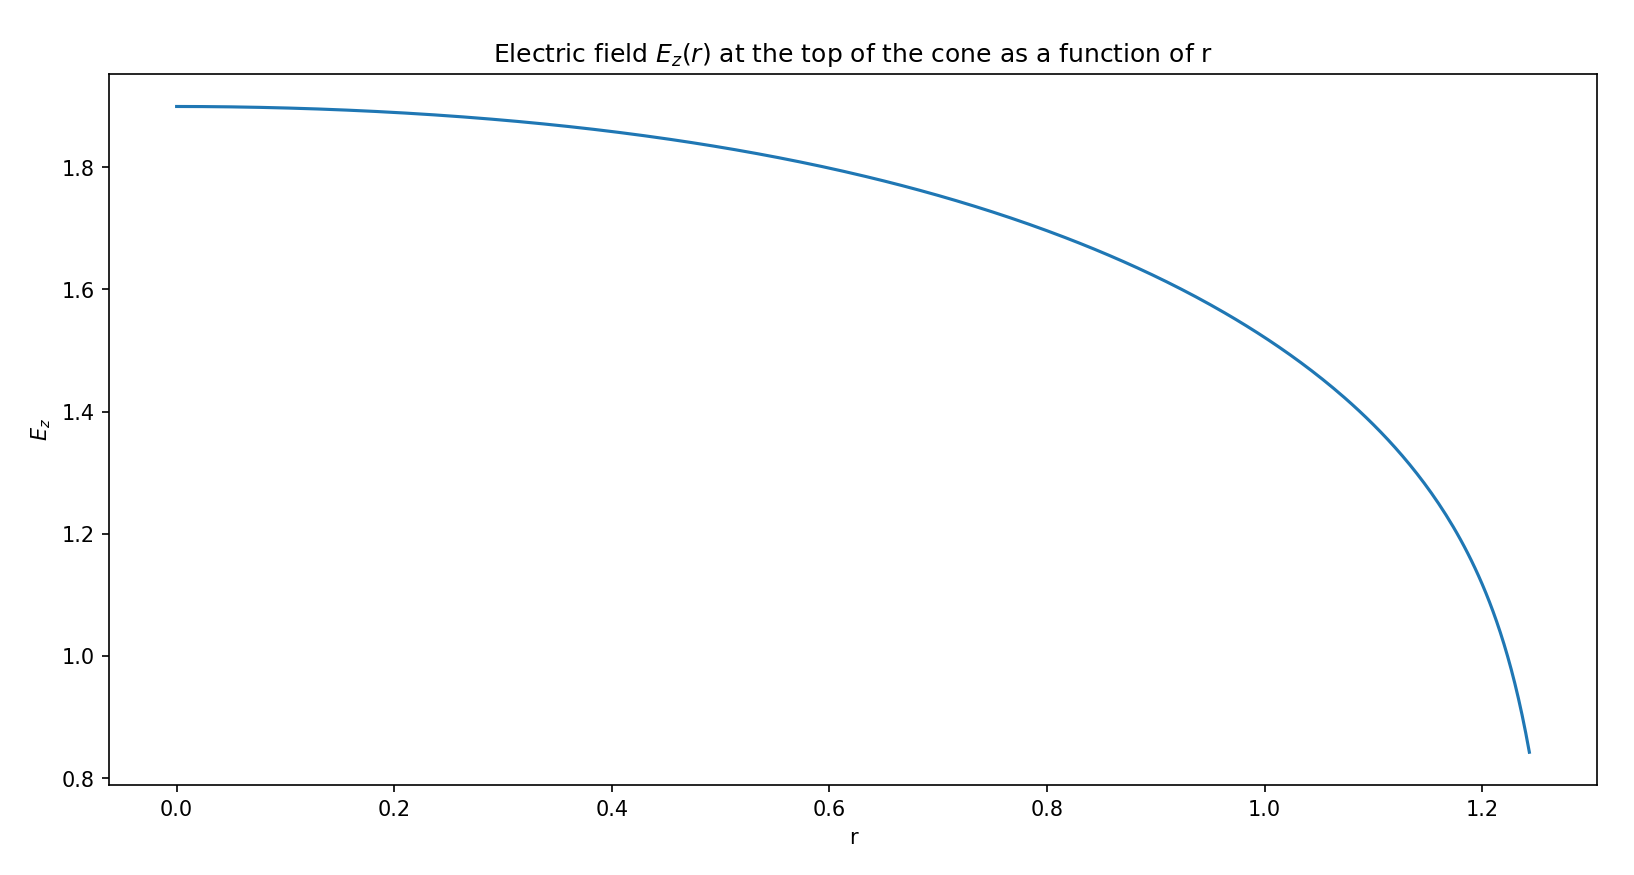

## Discussion

Looking at tables 1 and 2, we see that the percentage difference between the resistance calculated from the numerical solution is off from the analytical expression by a number on the order of 1 or 10. In other words, the difference is not large, but it is nonetheless significant. We would expect that in a real experiment (with an actual conical resistor), one could often times measure the difference. This also justifies the need to to our study. We see that the textbooks and the weekly exercises were wrong. If the difference were much smaller, there would be little need to suspend the assumptions underlying the analytical expression.

In Romano & Price, 1996, they report a $9 \%$ larger resistance than the analytical resistance when $a/h = 1/2$ and $b/h = 1$. Our method 1 and 2 gave respectively $8.8 \pm 1.0 \% $ and $10.3 \pm 0.4 \%$ difference in this case. Method 1 is consistent with this result, but in the case of method 2, a percentage difference of 9 does not fit within the uncertainty. This could imply that there is something wrong with method 2. However, considering that the difference is not great, a more realistic reason may be that our calculation of the uncertainty was not accurate enough; had we chosen more z-values to calculate the difference (especially z-values close to the top and bottom surface), we cmay have found a bigger uncertainty.

We see an interesting phenomenon, which is that the percentage difference increases for an increasing difference between b and a. More precisely, we would expect the percentage difference to be related to $\frac{b-a}{a}$ (since the percentage difference should not depend on an arbitrary scaling of the system) For example, we see that the percentage difference (calculated from method 2) increases from 9.4, 16.8 to 30.0 when $b$ changes from 3/4, 1 to 5/4 (with $a = 1/3$). This is as expected, as we explained in the introduction. For a bigger slope of the cone, the difference between the actual equiapotential surfaces (which, as shown in figure 5, is slanted downwards and normal to the boundary) and the assumption of parallell equipotential surfaces, we be worse. Alternatively, the difference arising from the fact that we have finite resistance in the r-direction will be bigger, since more of the current will be slanted towards the r-direction.

We also see from the tables that there is not a large difference in the uncertainty from the two methods. Checking case by case, it is also evident that the resistances calculated from the two methods are consistent (which is checked by seeing whether the intervals around the average value for the resistance with radius equal to the uncertainty overlap). However, there is a tendency for the uncertainty in method 2 to be less. For instance, for $a = 1/2$ and $b = 3/4$, the uncertainty in method 1 is $1.6$, but the uncertainty in method 2 is $0.14$. We expect that the reason for this is exactly because method 2 solves Laplace's equation on the cone with better resolution. In addition to the resolution, the fact that we solve Laplace's equation over a smaller area means that we can solve it with more iterations. However, despite these factors, the uncertainty from the two methods are often virtually the same. Thus, method 2 is not as much better as we would naively expect.

We see that for $a = 2/3$ and $b = 3/4$ that the uncertainty in the percentage difference is as large as the difference itself, for both methods. However, we see that both the difference and the uncertainty quite small (on the order of 1). That the difference is small is what we would expect when the slope is very small, since our cone becomes a better approximation to a cylinder, in which case we know that $R = \frac{h}{\sigma \pi r^2} \approx \frac{h}{\sigma \pi a b}$ exactly (where r is the radius, which in this case would be $a \approx b$).

Lastly, we see in figure 6 that the electric field drops almost to 0 at the upper corner of the cylinder (where $r \approx b$ and $z \approx h/2$). Thus, we see how the cone resolves the conflict between the boundary conditions on the corner. At the corner, the electric field must be tangential to the side boundary of the cone (von Neumann boundary conditions there), whereas the electric field must also be vertical, in order to be orthogonal to the top surface. This conflict is resolved by the fact that the electric field simply drops to 0 there.

We are convinced that method 2 is better in most cases. We see in the tables that method 2 consistently has either similar, or much smaller uncertainty  than method 1 in the percentage difference between the resistance and the analytical resistance. Moreover, it is cleaner (since it only solves Laplace's equation within the cone), and allows a number of points on the grid that provides much better resolution of the interior of the cone. The latter allows one to plot both the potential and electric field in this region in a robust way. Further, method 1 has an inherent source of error coming from the fact that we impose von Neumann boundary conditions on the edges of the finite rectangle in which we solve Laplace's equation. Lastly, method 2 is faster, even with more iterations in the solver of Laplace's equation, since the grid is generally smaller.

Importantly, the finite difference method becomes very computationally expensive as the number of datapoints increases. For method 2, the gridsize is adapted to accomodate the resistance parameters, and for small a/h as compared to b/h becomes very computationally intensive for method 2. Therefore, our method is likely not the best solution for this problem, and due to computational limitations we did not get great results for a wide range of model parameters.

## Conclusion

In modelling a truncated conical resistance, we estimated the error of the resistance from the textbook resistance, using a finite difference method. We found that the error depends on the dimensions of the cone, though the error was typically on the order of $10^0$ to $10^1$ %. We compared our error with the error found in the study of Romano & Price (1996), who found an error of $9$ % for a given choice of dimensions. We found the error to be $8.8 \pm 1.0$ % or $10.3 \pm 0.4$ %, depending on the method used. However, we also expand on their work by testing a small grid of parameters, finding greater deviation at larger angular deviations $\alpha$ from a cylinder. We provide two slightly different methods for finding the resistance numerically, where method 2 might be better for most dimensionalities, though perhaps is less robust than method 1. Method 2 is also very computationally expensive for some dimension parameters since it adjusts the grid size dynamically based on these parameters. Future studies may explore implicit methods or neural networks to solve a wider range of cases more effectively.

## Reference

Romano, J. D., & Price, R. H. (1996). The conical resistor conundrum: A potential solution. *American Journal of Physics*, 64(9), 1150-1156. https://doi.org/10.1119/1.18335